In [1]:
import pandas as pd
import numpy as np
import operator
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import math
from comparison_disagreement import comparisonStats
from comparison_disagreement import agreementScore


In [2]:
lime_results = pd.read_csv('exampleData/lime_exp_01.csv')
shap_results = pd.read_csv('exampleData/shap_exp_01.csv')
model_data = pd.read_csv('exampleData/adult_model_data.csv')
model_data_display = pd.read_csv('exampleData/adult_model_data_display.csv')

In [3]:
print(model_data_display.columns)
print(lime_results.columns)

Index(['Unnamed: 0', 'Age', 'Workclass', 'Education-Num', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain',
       'CapitalLoss', 'Hoursperweek', 'Country', 'income', 'prediction',
       'index'],
      dtype='object')
Index(['model', 'index', 'Age', 'Workclass', 'Education-Num', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain',
       'CapitalLoss', 'Hoursperweek', 'Country'],
      dtype='object')


c:\Users\co41c\anaconda3\envs\conda1\lib\site-packages\scipy\stats\stats.py:597: RuntimeWarning: Degrees of freedom <= 0 for slice
  return a.var(ddof=ddof, axis=axis)
c:\Users\co41c\anaconda3\envs\conda1\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


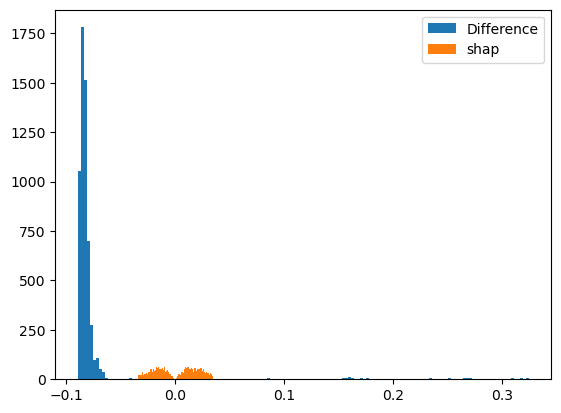

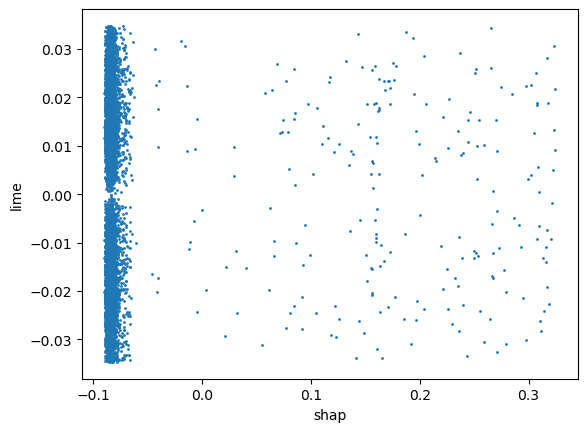

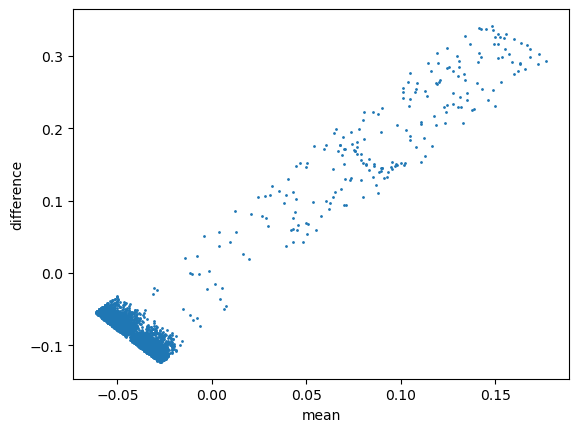

{'difference': {'mean': 0.005428579019206504, 'std': 0.6114841777409954, 'variance': 0.37391289962758123, 'median': -0.0797161103228168, 'mode*': -0.10224966761626886, 'importance': 0.16007821360309157}, 'shap': {'mean': 0.0062302764152253045, 'std': 0.6114389348470572, 'variance': 0.373857571046904, 'median': -0.0840033772019782, 'mode*': -0.08550265488144346, 'importance': 0.15972222212523762}, 'lime': {'mean': 0.000801697396018803, 'std': 0.022693928344236915, 'variance': 0.0005150143836933597, 'median': 0.0042888036398417, 'mode*': 0.012309779987736729, 'importance': 0.019925823947357077}, 'comparative': {'sign_match': 0.48595117457392906, 'sign_pos': 0.03746353446952249, 'sign_neg': 0.47658529095654845, 'importance': 0.13979639817788053, 'importance_sign_match': 0.9977883096366509, 'correlation': 0.016564118402279938, 'inverse-correlation': 0.019363695992493695, 'slope': -0.004215961366228141, 'linear_distance': 0.017465959177474327, 'sine_distance': 0.7100816054733924, 'normalize

In [4]:
print(comparisonStats(model_data_display, shap_results, lime_results, 'CapitalGain', display=True, percentile=5))

c:\Users\co41c\anaconda3\envs\conda1\lib\site-packages\scipy\stats\stats.py:597: RuntimeWarning: Degrees of freedom <= 0 for slice
  return a.var(ddof=ddof, axis=axis)
c:\Users\co41c\anaconda3\envs\conda1\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


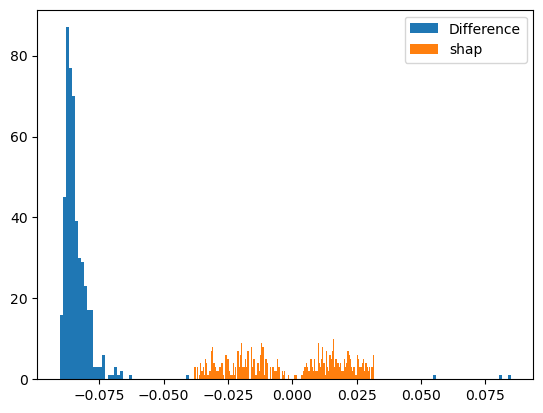

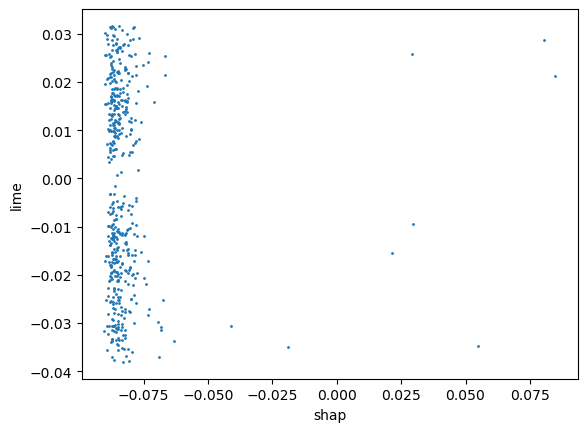

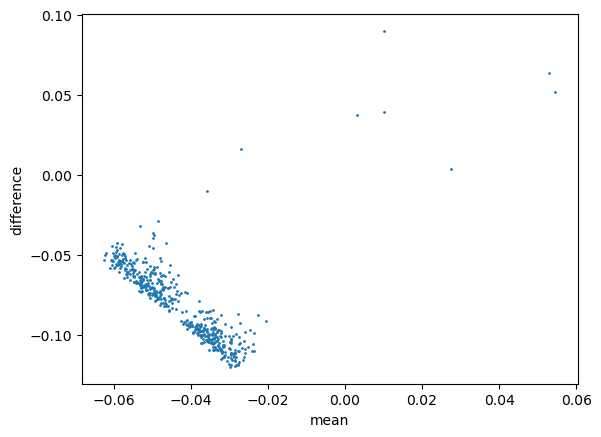

{'difference': {'mean': -0.03761073180650477, 'std': 0.23141635208968334, 'variance': 0.05355352801449629, 'median': -0.07675506408626165, 'mode*': -0.10127402752325299, 'importance': 0.11614796743692077}, 'shap': {'mean': -0.03978380506506491, 'std': 0.23092913071985394, 'variance': 0.05332826341502738, 'median': -0.0852655183942781, 'mode*': -0.08726605791973269, 'importance': 0.11865568675962164}, 'lime': {'mean': -0.0021730732585601396, 'std': 0.023816026690312686, 'variance': 0.0005672031273136862, 'median': -0.00539704068592085, 'mode*': 0.016054036837551692, 'importance': 0.021092372677655468}, 'comparative': {'sign_match': 0.5223880597014925, 'sign_pos': 0.029850746268656716, 'sign_neg': 0.44776119402985076, 'importance': 0.09756331408196617, 'importance_sign_match': 1.0, 'correlation': 0.031086370071481954, 'inverse-correlation': 0.020479427342998117, 'slope': -0.004359804439075143, 'linear_distance': 0.018535607265237883, 'sine_distance': 0.7101828789614308, 'normalized_dista

In [5]:
# 'Age', 'Workclass', 'Education-Num', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain','CapitalLoss', 'Hoursperweek', 'Country'
# print(comparisonStats(model_data_display, lime_results, shap_results, 'Age', display=True, percentile=2))
# print(comparisonStats(model_data_display, shap_results, lime_results, 'MaritalStatus', display=False, percentile=5))
print(comparisonStats(model_data_display, shap_results, lime_results, 'CapitalGain', values=[40,'Divorced'], operators=['>=','=='], headers=['Age','MaritalStatus'], display=True, percentile=5))

In [6]:
print(agreementScore(model_data_display, lime_results, shap_results, avoid_headers=['model', 'index', 'Country', 'Hoursperweek'], percentile=5))

0.38357632819181886
